Ayoub Benabbou: Project Quadrature Methods

Question 8:

Since the nodes $x_i$  are in $[-1;1]$, we apply the following change of variable

$\phi: [-1;1]->[a;b]$ such that for all $u$ in $[-1;1]$ $\phi(u)=\frac{a+b}{2}+u\frac{b-a}{2}$

In [1]:
import numpy as np
import scipy.special
from scipy.special import eval_legendre
import matplotlib.pyplot as plt

Question 9:

In [2]:
def phi(u,a,b):
    return (a+b)/2 + u*(b-a)/2
def gauss_legendre_simple(f,a,b,nodes,weights):
    """_summary_

    Args:
        f : function to integrate
        a : interval lower bound
        b : interval upper bound
        nodes : nodes of the method
        weights : weights of the method

    Returns:
        approximation of the integral using the Gauss-Legendre rule
    """
    I_hat = (b-a)*0.5*sum(w*f(phi(x,a,b)) for w, x in zip(weights, nodes))
    return I_hat


In [3]:
#Test

f = lambda x : x**2
a,b=0,1


n = 2
nodes, weights = scipy.special.roots_legendre(n)


print("Roots:", nodes)
print("Weights:", weights)
print(phi(nodes[0],a, b))
print(gauss_legendre_simple(f,a,b,nodes,weights))

Roots: [-0.57735027  0.57735027]
Weights: [1. 1.]
0.21132486540518713
0.33333333333333337


Question 10:

In [4]:
def gauss_legendre(f,n,M,a,b):
    nodes, weights = scipy.special.roots_legendre(n)
    I_hat_composite=0
    for i in range(M):
        I_hat_composite += gauss_legendre_simple(f,a+i*(b-a)/M,a+(i+1)*(b-a)/M,nodes,weights)
    return I_hat_composite

In [5]:
print(gauss_legendre(f,2,9,a,b))

0.3333333333333333


Question 11:

In [6]:
def gauss_legendre_vectorized(f,n,M,a,b):
  nodes, weights = scipy.special.roots_legendre(n)
  matrix = (a + (np.arange(M)) * ((b-a)/M) + a + (np.arange(M)+1) * ((b-a)/M)) / 2
  matrix = np.tile(matrix, (n, 1))
  I_hat_vectorized = np.sum(np.sum(f(np.full((M,n) , (b-a) / (2*M))*nodes + matrix.T) * weights, axis=1))*(b-a)/(2*M)
  return I_hat_vectorized




In [7]:
# Example usage:
def f(x):
    return x**2

n = 5  # Number of nodes for Gauss-Legendre quadrature
M = 10  # Number of subintervals for composite quadrature
a = 0   # Lower bound of integration
b = 1   # Upper bound of integration

result = gauss_legendre_vectorized(f, n, M, a, b)
print("Approximation of integral:", result)

Approximation of integral: 0.33333333333333337


Question 12:

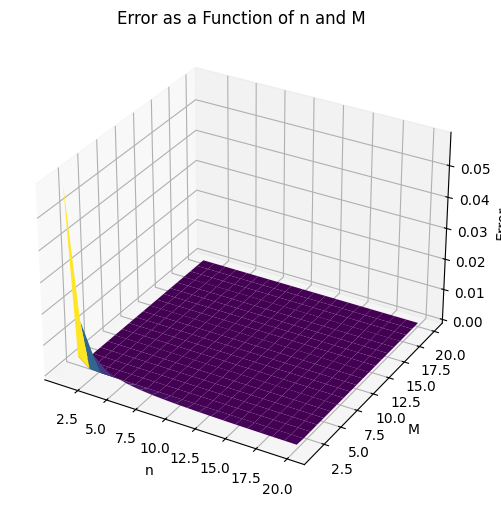

In [8]:
def error(f,n,M,a,b):
    result = scipy.integrate.quad(f, a, b)[0]
    approx = gauss_legendre(f,n,M,a,b)
    return abs(result - approx)

def f(x):
    return 1/x
a,b=2,5
max_n = 20
max_M = 20

errors = np.zeros((max_n, max_M))

# Compute errors for different values of n and M
for n in range(1, max_n + 1):
    for M in range(1, max_M + 1):
        errors[n - 1, M - 1] = error(f, n, M, a, b)


# Create meshgrid for n and M values
n_values = np.arange(1, max_n + 1)
M_values = np.arange(1, max_M + 1)
N, M = np.meshgrid(n_values, M_values)

# Plot the error as a function of n and M
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(N, M, errors, cmap='viridis')
ax.set_xlabel('n')
ax.set_ylabel('M')
ax.set_zlabel('Error')
ax.set_title('Error as a Function of n and M')
plt.show()



Question 13:

In [9]:
def trapezoidal(f,a,b,M):
    h=(b-a)/M
    I_trapez=h/2 * (f(a)+f(b)+ 2*sum(f(a+i*h) for i in range(0,M)))
    return I_trapez

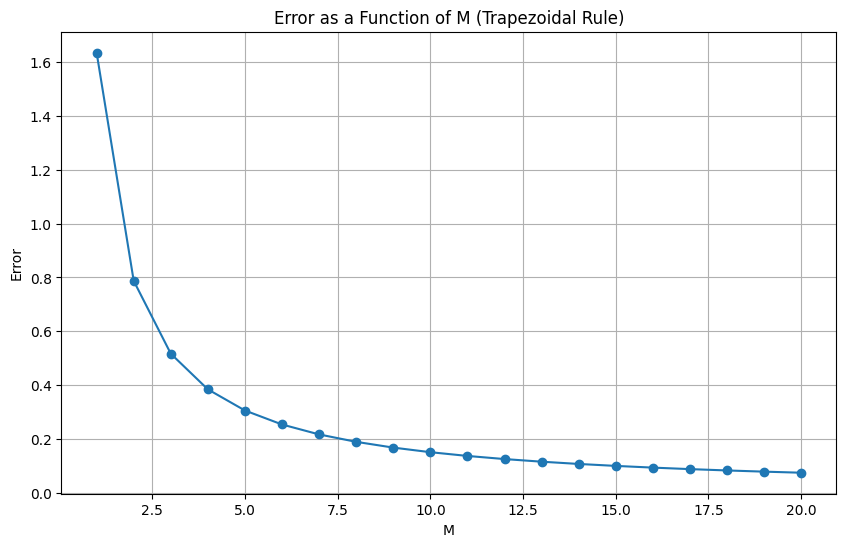

In [10]:
def error_trapez(f,M,a,b):
    result = scipy.integrate.quad(f, a, b)[0]
    approx = trapezoidal(f,a,b,M)
    return abs(result - approx)

def f(x):
    return 1/x
a,b=2,5
max_M = 20

errors_trapez = np.zeros(max_M)

# Compute errors for different values of M
for M in range(1, max_M + 1):
    errors_trapez[M - 1] = error_trapez(f, M, a, b)

# Plot the error as a function of M
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_M + 1), errors_trapez, marker='o', linestyle='-')
plt.xlabel('M')
plt.ylabel('Error')
plt.title('Error as a Function of M (Trapezoidal Rule)')
plt.grid(True)
plt.show()



Comparaison: With gauss_legendre rule, the error stays below 0.05 in the worst cases, whereas with the trapezoidal rule, the error stays above 0.1 in the best cases, so the gauss_legendre rule perofrms much better than the trapezoidl rule

Question 14:

In [11]:
# define Gauss_Hermite rule
def gauss_hermite_simple(f,a,b,nodes,weights):
    I_hat = (b-a)*0.5*sum(w*f(x) for w, x in zip(weights, nodes))
    return I_hat

def gauss_hermite(f,n,M,a,b):
    nodes, weights = scipy.special.roots_hermite(n)
    I_hat_composite=0
    for i in range(M):
        I_hat_composite += gauss_hermite_simple(f,a+i*(b-a)/M,a+(i+1)*(b-a)/M,nodes,weights)
    return I_hat_composite

In [12]:
# define Gauss_Laguerre rule
def gauss_laguerre_simple(f,a,b,nodes,weights):
    I_hat = (b-a)*0.5*sum(w*f(x) for w, x in zip(weights, nodes))
    return I_hat

def gauss_laguerre(f,n,M,a,b):
    nodes, weights = scipy.special.roots_laguerre(n)
    I_hat_composite=0
    for i in range(M):
        I_hat_composite += gauss_laguerre_simple(f,a+i*(b-a)/M,a+(i+1)*(b-a)/M,nodes,weights)
    return I_hat_composite

Since X follows a standard normal distribution, we have

$P(X<=a)= \int_{-∞}^{a} f(x) \, dx = 0.5 + \int_{0}^{a} f(x) \, dx $

So we use the Gauss rules to calculate the second integral, which is easier, and add 0.5 to get the probability we want

0.7886751345948129
0.6307891459325606
0.841344746068543
0.8413447460685429


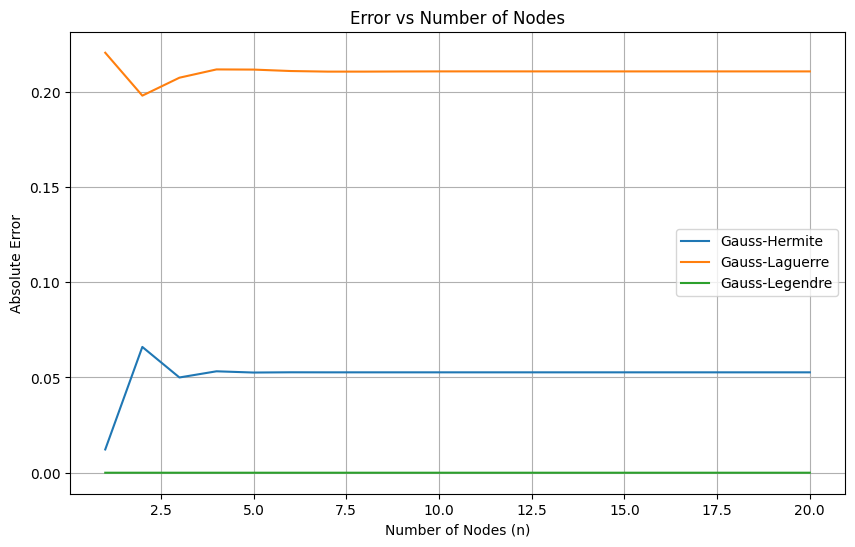

In [13]:
f= scipy.stats.norm.pdf
n=200
M= 100
a,b=0,1
print(0.5+gauss_hermite(f,n,M,a,b))
print(0.5+gauss_laguerre(f,n,M,a,b))
print(0.5+gauss_legendre(f,n,M,a,b))
print(scipy.stats.norm.cdf(1))
n_values = np.arange(1, 21)  # Values of n to test

errors_hermite = []
errors_laguerre = []
errors_legendre = []

# Compute errors for different values of n

exact_integral = scipy.stats.norm.cdf(1)
for n in n_values:
    result_hermite = 0.5 + gauss_hermite(f, n, M, a, b)
    result_laguerre = 0.5 + gauss_laguerre(f, n, M, a, b)
    result_legendre = 0.5 + gauss_legendre(f, n, M, a, b)

    # Compute the absolute errors
    error_hermite = np.abs(result_hermite - exact_integral)
    error_laguerre = np.abs(result_laguerre - exact_integral)
    error_legendre = np.abs(result_legendre - exact_integral)

    errors_hermite.append(error_hermite)
    errors_laguerre.append(error_laguerre)
    errors_legendre.append(error_legendre)

# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(n_values, errors_hermite, label='Gauss-Hermite')
plt.plot(n_values, errors_laguerre, label='Gauss-Laguerre')
plt.plot(n_values, errors_legendre, label='Gauss-Legendre')
plt.xlabel('Number of Nodes (n)')
plt.ylabel('Absolute Error')
plt.title('Error vs Number of Nodes')
plt.legend()
plt.grid(True)
plt.show()




The most accurate rule is the Gauss-Legendre rule. We can explain that by the choice we made to change the approximation from approximating a infinte lower bound integral to a finite lower bound integral. So the interval over which we integrate is of the form $[a;b]$ where both $a$ and  $b$ are finite. And by the form of the space X the nodes that are most adapted are those of legendre polynomials.